In [1]:
import pandas as pd
import os
import matplotlib.pyplot as plt

In [2]:
folder_path = r"C:\Users\rodge\OneDrive\Desktop\SML\Group Project\comp90051\data\rawData\unzip_file"

csv_files = [f for f in os.listdir(folder_path) if f.endswith('.csv')]

# read CSV files and assign them to DataFrames based on file name
for file in csv_files:
    file_path = os.path.join(folder_path, file)
    df_name = os.path.splitext(file)[0]
    
    # 将读取的DataFrame赋值给变量
    globals()[df_name] = pd.read_csv(file_path)



C:\Users\rodge\AppData\Local\Temp\ipykernel_37444\377090556.py:11: DtypeWarning: Columns (15) have mixed types. Specify dtype option on import or set low_memory=False.
  globals()[df_name] = pd.read_csv(file_path)


In [ ]:
'''
import pandas as pd

file_path = r"H:\sml data\EPIC_flowsheets\3_2018-4633_FLOWSHEETS_20221014.csv"

# 跳过错误行
data = pd.read_csv(file_path, on_bad_lines='skip')  # 对较新版本，改用 on_bad_lines='skip'

# 查看前几行数据
print(data.head())

'''

In [ ]:
'''

OR_CASE_ID = 'ea6e9c7672a471ac'

new_df1 = data[data['OR_CASE_ID'] == OR_CASE_ID]
new_df2 = new_df1[new_df1['FLO_DISPLAY_NAME'] == 'CI (l/min/m2)']
new_df2

'''

C:\Users\rodge\AppData\Local\Temp\ipykernel_41872\3882532418.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_df2['RECORDED_TIME'] = pd.to_datetime(new_df2['RECORDED_TIME'])


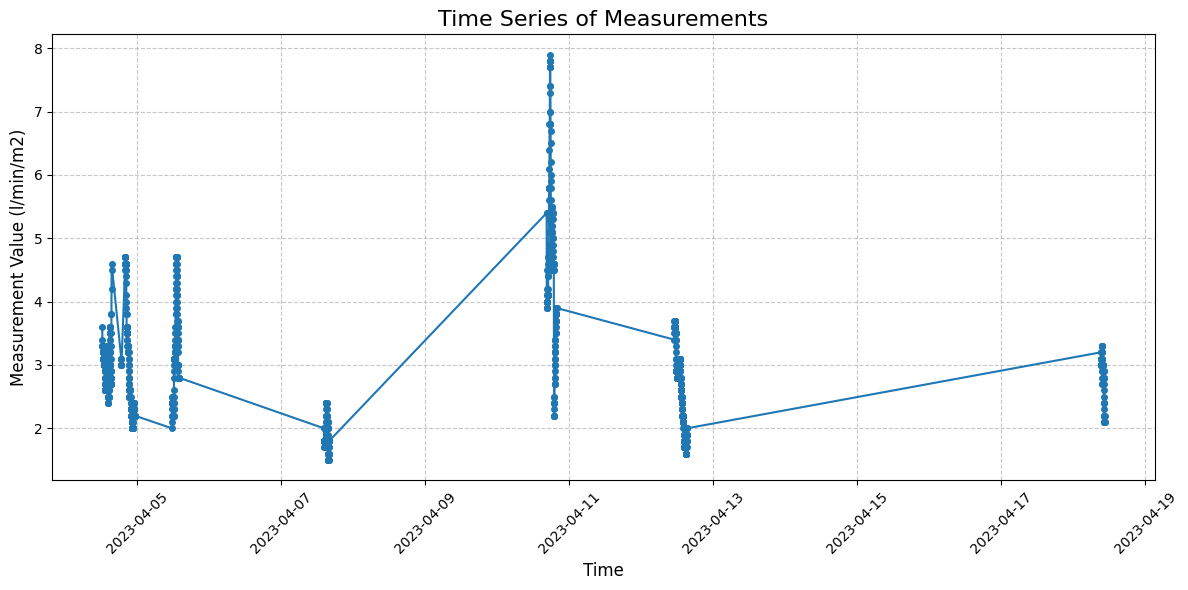

In [47]:
'''
new_df2['RECORDED_TIME'] = pd.to_datetime(new_df2['RECORDED_TIME'])
df = new_df2.copy()

df['MEAS_VALUE'] = df['MEAS_VALUE'].astype(float)

# 按时间排序
df = df.sort_values('RECORDED_TIME')

# 设置 RECORDED_TIME 为索引
df.set_index('RECORDED_TIME', inplace=True)

# 创建折线图
plt.figure(figsize=(12, 6))
plt.plot(df.index, df['MEAS_VALUE'], marker='o', linestyle='-', markersize=4)

# 设置标题和标签
plt.title('Time Series of Measurements', fontsize=16)
plt.xlabel('Time', fontsize=12)
plt.ylabel('Measurement Value (l/min/m2)', fontsize=12)

# 旋转 x 轴标签以避免重叠
plt.xticks(rotation=45)

# 添加网格线
plt.grid(True, linestyle='--', alpha=0.7)

# 调整布局并显示图表
plt.tight_layout()
plt.show()

'''

In [8]:
post_op = patient_post_op_complications.copy()
post_op.head()

,LOG_ID,MRN,Element_Name,CONTEXT_NAME,Element_abbr,SMRTDTA_ELEM_VALUE
0,b00c588406aae5cc,1a42f0bed60c5598,AN AQI POST-OP COMPLICATIONS,ENCOUNTER,AN Post-op Complications,NaN
1,a16571d21874c0a7,596a6dc60f54a0bb,AN AQI POST-OP COMPLICATIONS,NOTE,AN Post-op Complications,NaN
2,a16571d21874c0a7,596a6dc60f54a0bb,AN AQI POST-OP COMPLICATIONS,NOTE,AN Post-op Complications,NaN
3,1d9ff2d157fa4c86,60e6ea6cf06b58d7,AN AQI POST-OP COMPLICATIONS,ORDER,AN Post-op Complications,NaN
4,2ae43a4a39735956,59c5483e0654e105,AN AQI POST-OP COMPLICATIONS,ENCOUNTER,AN Post-op Complications,Other


In [11]:
# check duplicates value
post_op_unique = post_op.drop_duplicates(subset=['LOG_ID', 'MRN', 'Element_abbr'])

# calculate the percentage of each complication
complication_counts = post_op_unique['Element_abbr'].value_counts(normalize=True) * 100

# sort the results
complication_counts_sorted = complication_counts.sort_values(ascending=False)

print(complication_counts_sorted)


Element_abbr
AN Post-op Complications    95.616438
Other                        1.252233
Cardiovascular               0.863609
Respiratory                  0.814473
Airway                       0.464562
Neurological                 0.208457
Administrative               0.175700
Metabolic                    0.175700
Injury/Infection             0.166766
Medication                   0.125074
Regional                     0.089339
Chronic Pain                 0.047647
Name: proportion, dtype: float64


In [12]:
procedure = patient_procedure_events.copy()
procedure.head()

,LOG_ID,MRN,EVENT_DISPLAY_NAME,EVENT_TIME,NOTE_TEXT
0,a739a81fc152e77c,3936fad285669edf,"Transported to PACU/ICU with O2, vital signs s...",8/9/19 11:47,NaN
1,a6494a6557e211ff,3b095ccb1c4f124f,Two Anti-Emetics Administered,6/17/19 11:54,NaN
2,a6494a6557e211ff,3b095ccb1c4f124f,Two Anti-Emetics Administered,6/17/19 11:54,NaN
3,e1a066d449ed18b0,499386c1a8693fd0,Sign In,4/27/19 0:38,NaN
4,e1a066d449ed18b0,499386c1a8693fd0,Quick Note,4/27/19 3:04,NaN


In [ ]:
# check duplicates value
procedure_unique = post_op.drop_duplicates(subset=['LOG_ID', 'MRN', 'EVENT_DISPLAY_NAME','EVENT_TIME'])

# calculate the percentage of each complication
procedure_count = post_op_unique['EVENT_DISPLAY_NAME'].value_counts(normalize=True) * 100

# sort the results
complication_counts_sorted = complication_counts.sort_values(ascending=False)

print(complication_counts_sorted)